<a href="https://colab.research.google.com/github/Muthu329/Indian-Railway-analytics-project/blob/main/Real_world_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_schedule = pd.read_csv('/content/isl_wise_train_detail_03082015_v1.csv')
df_confirmation = pd.read_csv('/content/Railway Ticket Confirmation.csv')
df_schedule.info()
df_confirmation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69006 entries, 0 to 69005
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Train No.                 69006 non-null  object
 1   train Name                69006 non-null  object
 2   islno                     69006 non-null  int64 
 3   station Code              69006 non-null  object
 4   Station Name              69006 non-null  object
 5   Arrival time              69006 non-null  object
 6   Departure time            69006 non-null  object
 7   Distance                  69006 non-null  int64 
 8   Source Station Code       69006 non-null  object
 9   source Station Name       69006 non-null  object
 10  Destination station Code  69006 non-null  object
 11  Destination Station Name  69006 non-null  object
dtypes: int64(2), object(10)
memory usage: 6.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data col

# Data cleaning

In [ ]:
# Clean column names
df_schedule.columns = df_schedule.columns.str.strip()
df_confirmation.columns = df_confirmation.columns.str.strip()

# Convert dates
df_confirmation['Date of Journey'] = pd.to_datetime(df_confirmation['Date of Journey'], errors='coerce')
df_confirmation['Booking Date'] = pd.to_datetime(df_confirmation['Booking Date'], errors='coerce')

# Convert to numeric
df_confirmation['Waitlist Position'] = pd.to_numeric(df_confirmation['Waitlist Position'], errors='coerce')

There is no table nee to be cleaned

# :EDA (Exploatory Data Analysis)



In [ ]:
# Summary counts
print(df_confirmation['Confirmation Status'].value_counts())
print(df_confirmation['Train Type'].value_counts())
print(df_confirmation['Class of Travel'].value_counts())

# Most common stations
print(df_schedule['Station Name'].value_counts().head(10))

# Distance summary
print(df_schedule['Distance'].describe())

Confirmation Status
Confirmed        19947
Not Confirmed    10053
Name: count, dtype: int64
Train Type
Shatabdi     7621
Rajdhani     7593
Express      7413
Superfast    7373
Name: count, dtype: int64
Class of Travel
Sleeper    7613
1AC        7482
3AC        7460
2AC        7445
Name: count, dtype: int64
Station Name
VIJAYAWADA JN      313
VADODARA JN        298
KANPUR CENTRAL     283
SURAT              267
ITARSI JN          262
AHMEDABAD JN       255
KALYAN JN          254
BHUSAVAL JN        248
NAGPUR             243
NEW DELHI          239
Name: count, dtype: int64
count    69006.000000
mean       647.798583
std        643.416471
min          0.000000
25%        173.000000
50%        432.000000
75%        931.000000
max       4273.000000
Name: Distance, dtype: float64


# Visualization

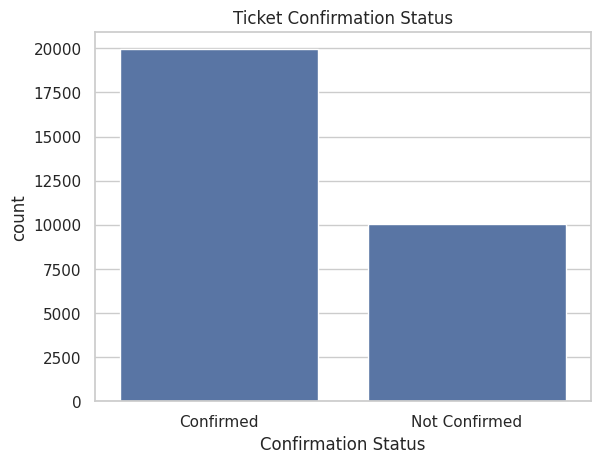

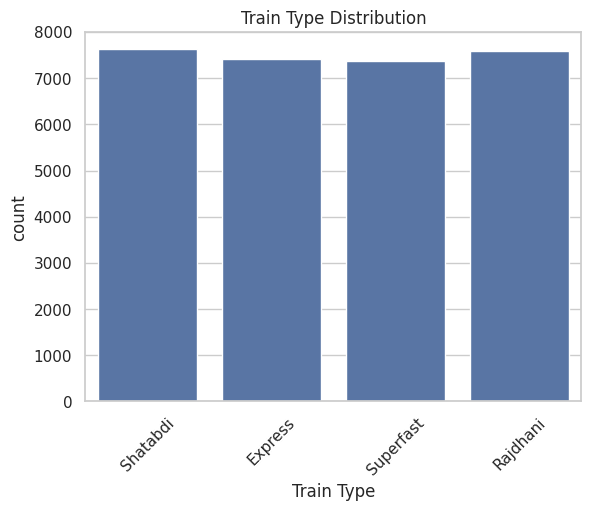

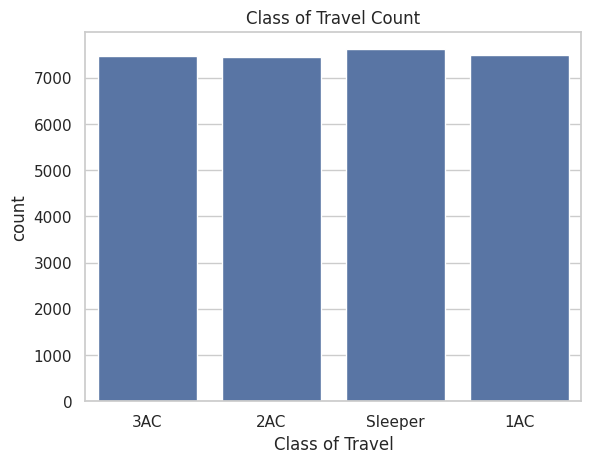

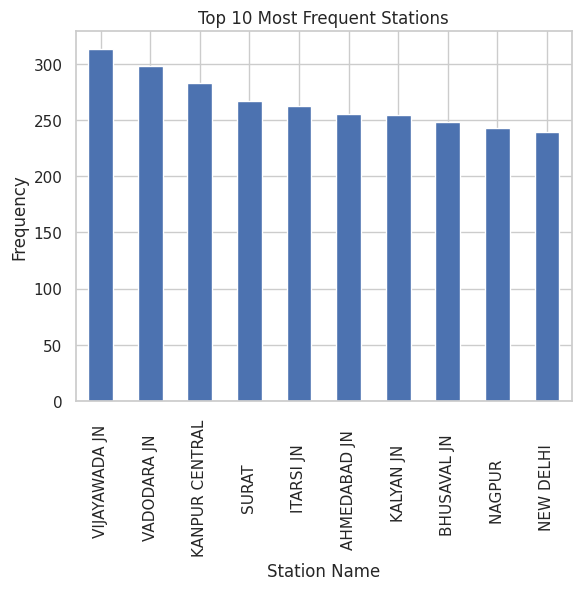

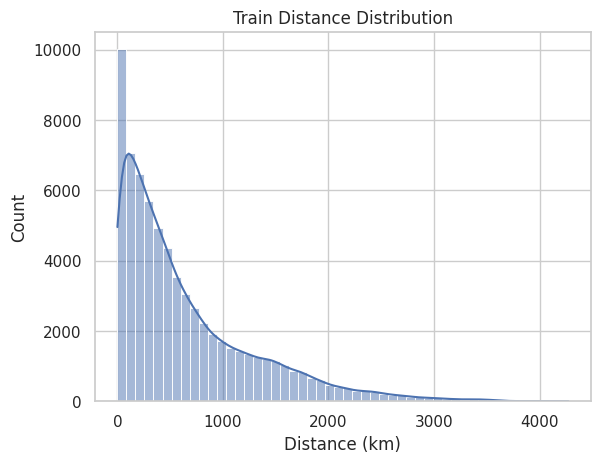

In [ ]:
sns.set(style="whitegrid")

# Confirmation Status
sns.countplot(x='Confirmation Status', data=df_confirmation)
plt.title('Ticket Confirmation Status')
plt.show()

# Train Type
sns.countplot(x='Train Type', data=df_confirmation)
plt.title('Train Type Distribution')
plt.xticks(rotation=45)
plt.show()

# Class of Travel
sns.countplot(x='Class of Travel', data=df_confirmation)
plt.title('Class of Travel Count')
plt.show()

# Top Stations
df_schedule['Station Name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent Stations')
plt.ylabel('Frequency')
plt.show()

# Distance Distribution
sns.histplot(df_schedule['Distance'], bins=50, kde=True)
plt.title('Train Distance Distribution')
plt.xlabel('Distance (km)')
plt.show()